In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Name of the CSV file
file = Path('resources/Necropolis.items.csv')

In [3]:
# The correct encoding must be used to read the CSV in pandas
df = pd.read_csv(file, sep = ";")

/var/folders/sz/6_1pzg752954k81873wl0rkc0000gn/T/ipykernel_78479/2035479833.py:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep = ";")


In [4]:
df['Week'] = pd.to_datetime(df['Date'], errors = 'coerce').dt.isocalendar().week


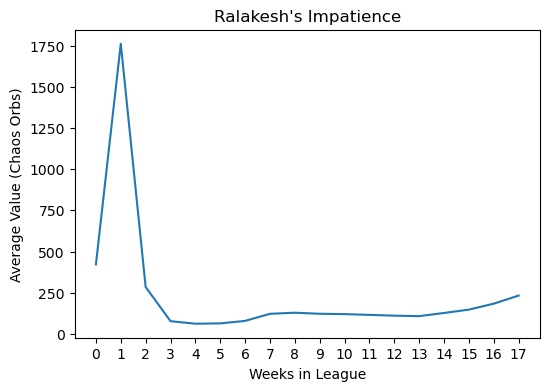

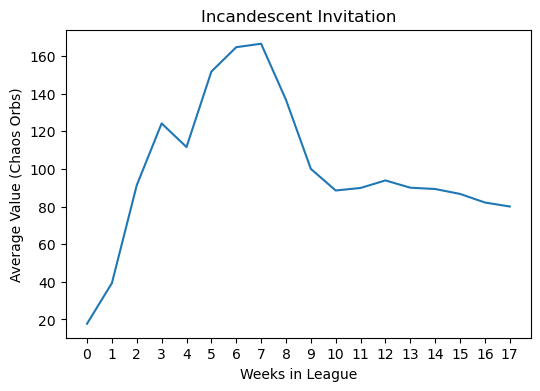

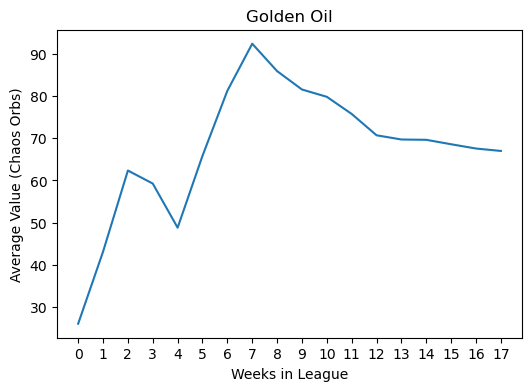

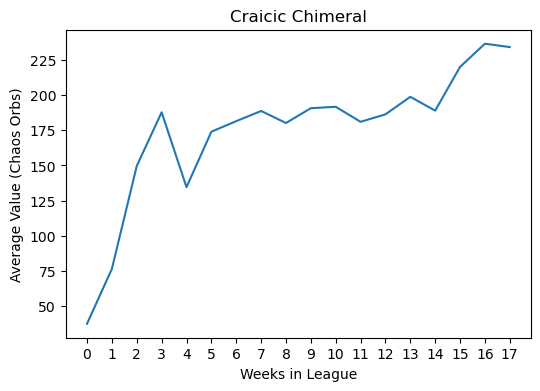

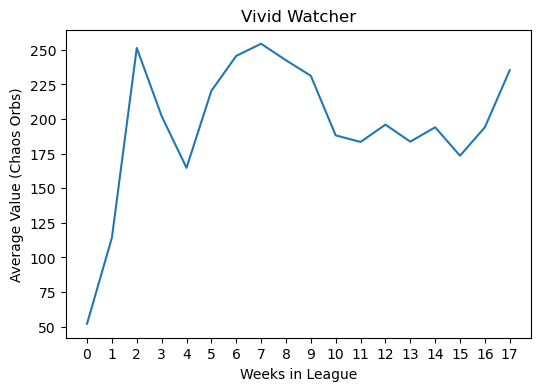

In [12]:
items = [ "Ralakesh's Impatience", 
'Incandescent Invitation', 
 'Golden Oil', 
 'Craicic Chimeral', 
 'Vivid Watcher',
]

for i in items:
    itemTable = df[df['Name'] == i ][['Week','Value']].groupby('Week').mean().copy()
    
    itemTable = itemTable.reset_index()
    
    itemTable['Week'] = itemTable['Week'].astype(int) - 13
    
    mainplot = itemTable.plot.line('Week','Value',legend=False,figsize=(6, 4))
    
    plt.xticks(ticks=itemTable['Week'].sort_values().unique(), labels=itemTable['Week'].sort_values().unique())
    
    plt.xlabel("Weeks in League")
    plt.ylabel("Average Value (Chaos Orbs)")
    plt.title(i)
    plt.savefig(f"{i}.png",format='png')
    plt.show()



In [6]:
analysis = df[df['Type'].isin(['UniqueArmour','UniqueWeapon' 'Oil', 'Beast', 'Invitation'])].copy()
analysis['Week'] = analysis['Week'].dropna()
analysis['Week'] = analysis['Week'].astype(int) - 13

# ['UniqueArmour','UniqueWeapon' 'Oil', 'Beast', 'Invitation']
# group  = analysis[['Name','Value']].groupby('Name').first()

week1 = analysis[(analysis['Week'] == 0)][['Name','Value']].groupby('Name').mean().reset_index()
week1 = week1[(week1['Value'] < 100)]

bool = (analysis['Week'] > 0) & (analysis['Week'] < 9)

week2_8 = analysis[analysis['Name'].isin(week1['Name'])][bool][['Week','Name','Value']].groupby(['Week','Name']).mean().copy().reset_index()


sellhighs = pd.merge(week2_8,week1, on = 'Name', how = 'inner')
sellhighs = sellhighs[(sellhighs['Value_x'] > sellhighs['Value_y'])]
sellhighs['Difference'] = sellhighs['Value_x']/ sellhighs['Value_y']


sellhighs = sellhighs[(sellhighs['Difference'] > 2)].sort_values('Difference',ascending = False)

finallist = sellhighs['Name'].unique()

len(finallist)
# sellhighs = sellhighs[(sellhighs['Week'] > 1) & (sellhighs['Week'] < 9) & (sellhighs['Value'] > 399)][['Name','Value']].groupby('Name').mean().reset_index()

/var/folders/sz/6_1pzg752954k81873wl0rkc0000gn/T/ipykernel_78479/2415758136.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  week2_8 = analysis[analysis['Name'].isin(week1['Name'])][bool][['Week','Name','Value']].groupby(['Week','Name']).mean().copy().reset_index()


132

/var/folders/sz/6_1pzg752954k81873wl0rkc0000gn/T/ipykernel_78479/224197680.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  analysis[analysis['Name'].isin(finallist)][analysis['Value'] < 11000].plot.scatter('Week','Value')


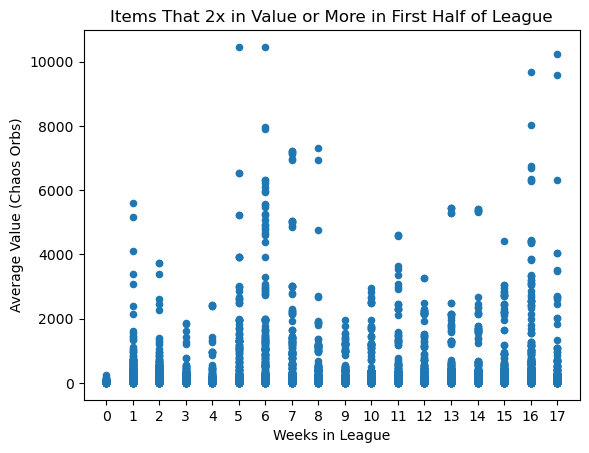

In [7]:
analysis[analysis['Name'].isin(finallist)][analysis['Value'] < 11000].plot.scatter('Week','Value')

plt.xticks(ticks=analysis['Week'].sort_values().unique(), labels= analysis['Week'].sort_values().unique())
    
plt.xlabel("Weeks in League")
plt.ylabel("Average Value (Chaos Orbs)")
plt.title("Items That 2x in Value or More in First Half of League")
plt.savefig(f"{"Final Analysis"}.png",format='png')
plt.show()

In [8]:
analysis[analysis['Name'].isin(finallist)][['Type','Name']].drop_duplicates().groupby('Type').size()

Type
Beast            13
Invitation        3
UniqueArmour    116
dtype: int64

In [10]:
#list of items that cost under 200 and 2x in the first half of the league. 
finallist

array(["Asphyxia's Wrath", 'Blackgleam', 'Lycosidae',
       'Rise of the Phoenix', "Emperor's Vigilance", 'The Oppressor',
       "Cloak of Tawm'r Isley", "Kaom's Heart", "Lioneye's Remorse",
       'Vix Lunaris', 'Dawnbreaker', "Victario's Charity",
       'The Flawed Refuge', 'Cowl of the Thermophile', 'Rooster Demon',
       "Replica Victario's Charity", 'Magna Eclipsis', "Titucius' Span",
       'Invictus Solaris', 'The Ghastly Theatre', "Saffell's Frame",
       'Stygian Silverback', "Chernobog's Pillar", "Death's Oath",
       'Replica Eternity Shroud', 'Sporeguard', 'Dawnstrider',
       "Doedre's Skin", 'Sand Serpent', 'Replica Perfect Form',
       'Redblade Banner', 'Perfidy', "Replica Ambu's Charge",
       'Tunnelfiend', 'The Perfect Form', "Voll's Protector",
       'Inextricable Fate', 'Vivid Vulture', 'Woods Ursa',
       'Infernal Mantle', "Expedition's End", 'Voidwalker', 'The Admiral',
       "Volkuur's Guidance", 'Third Piece of Directions',
       "Atziri's Splendo